In [122]:
import numpy as np
import awkward as ak
import fastjet
import uproot as ur
import matplotlib.colors as mcolors
import mplhep as hep
import matplotlib.pyplot as plt
import math
import matplotlib as colors
import matplotlib as abc
from scipy.optimize import curve_fit
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle
import hist
from hist import Hist

hep.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [123]:
sPHENIX_pt = np.linspace(17.5,47.5,7)

sPHENIX_uncorr_sigmapt = np.array([0.2841199606686332,
 0.2019174041297935,
 0.17615535889872172,
 0.1617994100294985,
0.1511799410029498,
 0.14429695181907565,
0.13564405113077677])

sPHENIX_corr_sigmapt = np.array([0.23689655172413787,
0.1734482758620689,
 0.1541379310344827,
0.14290640394088666,
 0.1367980295566502,
 0.13128078817733985,
 0.12655172413793098])


sPHENIX_uncorr_scale = np.array([
0.6580392156862744,
0.7050980392156863,
0.7254901960784313,
 0.7372549019607842,
 0.7513725490196078,
 0.7607843137254902,
0.7670588235294118])

sPHENIX_corr_scale = np.array([0.9898039215686274,
 1.003921568627451,
1.003921568627451,
0.9976470588235294,
0.9968627450980392,
0.9992156862745099,
0.9984313725490197])


[17.5 22.5 27.5 32.5 37.5 42.5 47.5]


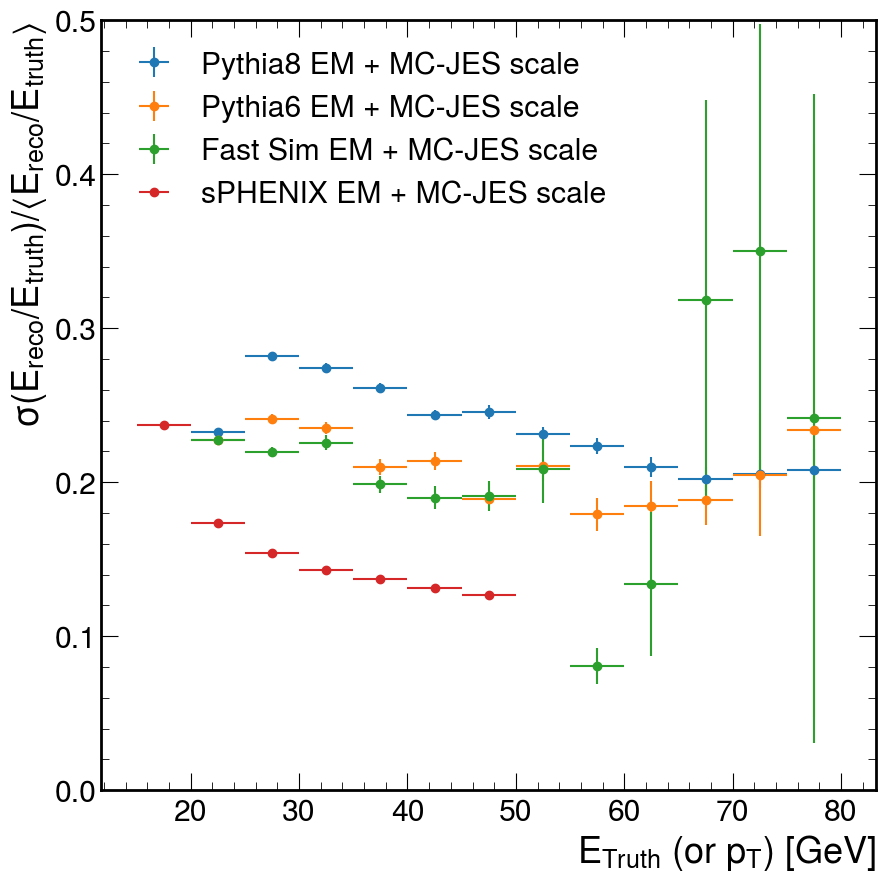

In [132]:
with open('Res_Pythia8_CPythia8.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label="Pythia8 EM + MC-JES scale")

#with open('Res_Pythia8_C6.pickle', 'rb') as handle:
#    bins, Res, ResErr = pickle.load(handle)

#plt.errorbar(bins,Res,yerr=ResErr,fmt="o", label="P8 C6")

#with open('Res_Pythia6_C8.pickle', 'rb') as handle:
#    bins, Res, ResErr = pickle.load(handle)

#plt.errorbar(bins,Res,yerr=ResErr,fmt="o", label="P6 C8")

with open('Res_Pythia6_CPythia6.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label="Pythia6 EM + MC-JES scale")

with open('Res_DELPHES_CDELPHES.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)


plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label="Fast Sim EM + MC-JES scale")

plt.errorbar(sPHENIX_pt,sPHENIX_corr_sigmapt,xerr=5/2,fmt='o',label='sPHENIX EM + MC-JES scale')

plt.ylabel(r'$\sigma(E_{\mathrm{reco}}/E_{\mathrm{truth}})/ \langle E_{\mathrm{reco}}/E_{\mathrm{truth}}\rangle $')
plt.legend(loc='upper left')
plt.ylim(0,0.5)
plt.xlabel(r'$E_\mathrm{Truth}$ (or $p_{\mathrm{T}}$) [GeV]')

print(sPHENIX_pt)


Text(1, 0, '$E_\\mathrm{Truth}$ (or $p_{\\mathrm{T}}$) [GeV]')

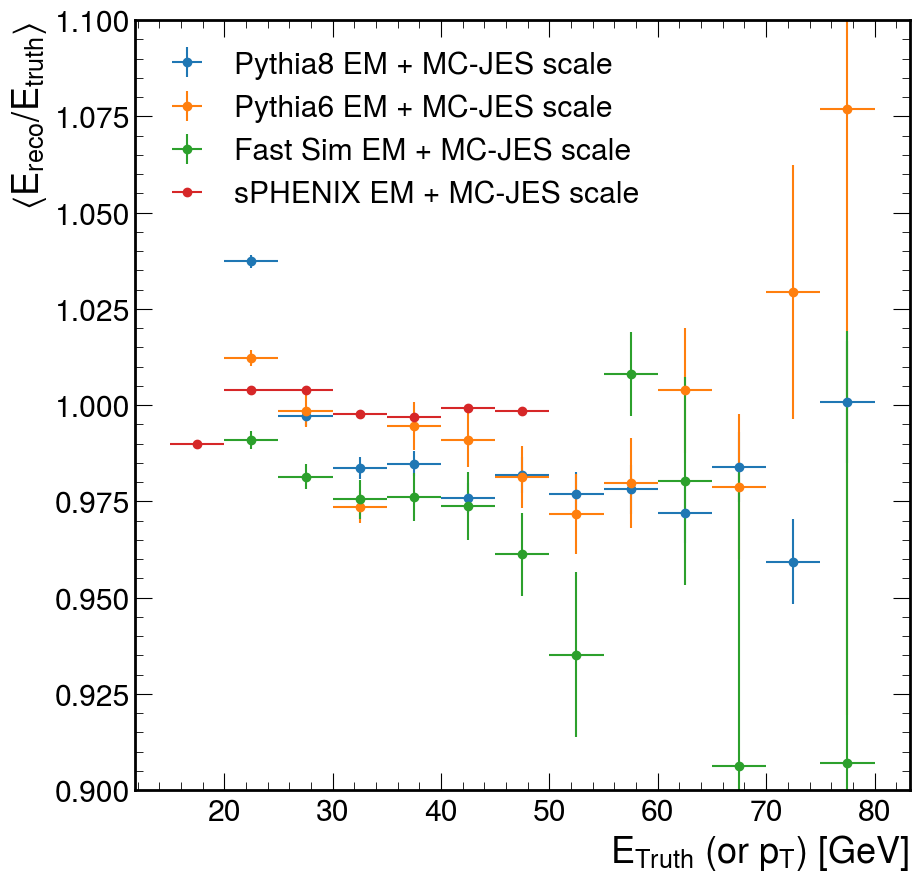

In [133]:
with open('R_Pythia8_CPythia8.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label="Pythia8 EM + MC-JES scale")

#with open('R_Pythia8_C6.pickle', 'rb') as handle:
#    bins, Res, ResErr = pickle.load(handle)

#plt.errorbar(bins+5,Res,yerr=ResErr,xerr=5,fmt="-o", label="P8 C6")

#with open('R_Pythia6_C8.pickle', 'rb') as handle:
#    bins, Res, ResErr = pickle.load(handle)

#plt.errorbar(bins+5,Res,yerr=ResErr,xerr=5,fmt="-o", label="P6 C8")

with open('R_Pythia6_CPythia6.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label="Pythia6 EM + MC-JES scale")

with open('R_DELPHES_CDELPHES.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)


plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label="Fast Sim EM + MC-JES scale")

plt.errorbar(sPHENIX_pt,sPHENIX_corr_scale,xerr=5/2,fmt='o',label='sPHENIX EM + MC-JES scale')

plt.ylabel(r'$\langle E_{\mathrm{reco}}/E_{\mathrm{truth}}\rangle $')
plt.legend(loc='best')
plt.ylim(0.9,1.1)
plt.xlabel(r'$E_\mathrm{Truth}$ (or $p_{\mathrm{T}}$) [GeV]')




(0.0, 0.5)

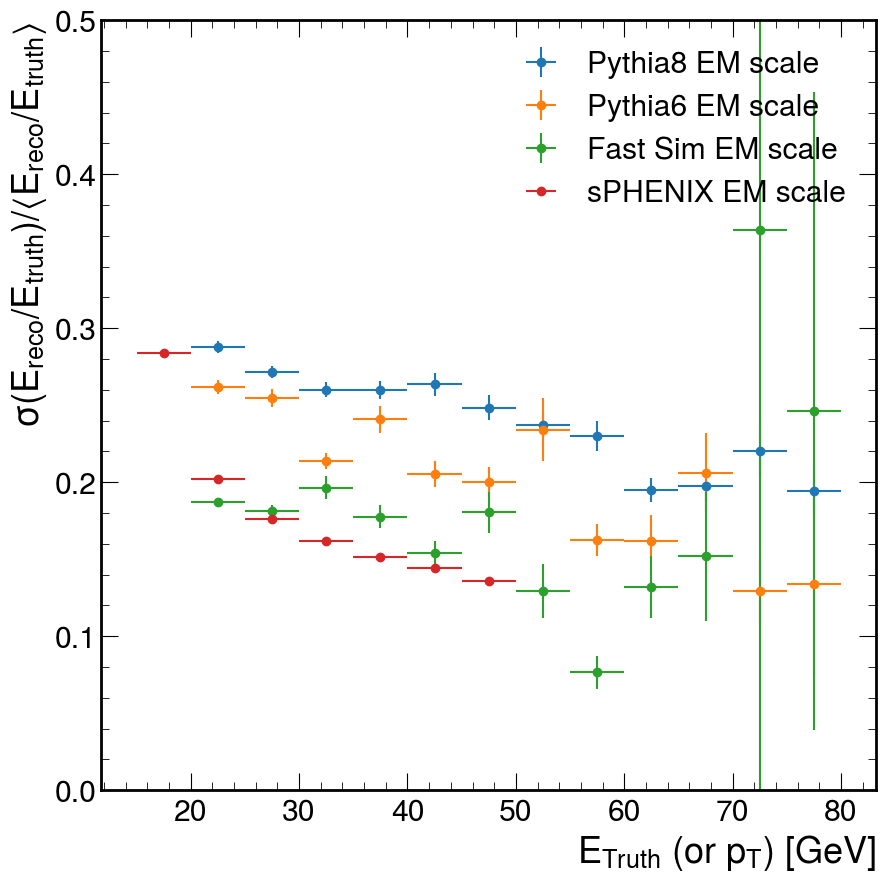

In [134]:
with open('Res_Pythia8_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Pythia8 EM scale')

with open('Res_Pythia6_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Pythia6 EM scale')

with open('Res_DELPHES_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)



plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Fast Sim EM scale')


plt.errorbar(sPHENIX_pt,sPHENIX_uncorr_sigmapt,xerr=5/2,fmt='o',label='sPHENIX EM scale')
plt.ylabel(r'$\sigma(E_{\mathrm{reco}}/E_{\mathrm{truth}})/ \langle E_{\mathrm{reco}}/E_{\mathrm{truth}}\rangle $')
plt.xlabel(r'$E_\mathrm{Truth}$ (or $p_{\mathrm{T}}$) [GeV]')


plt.legend()
plt.ylim(0,0.5)


(0.0, 0.5)

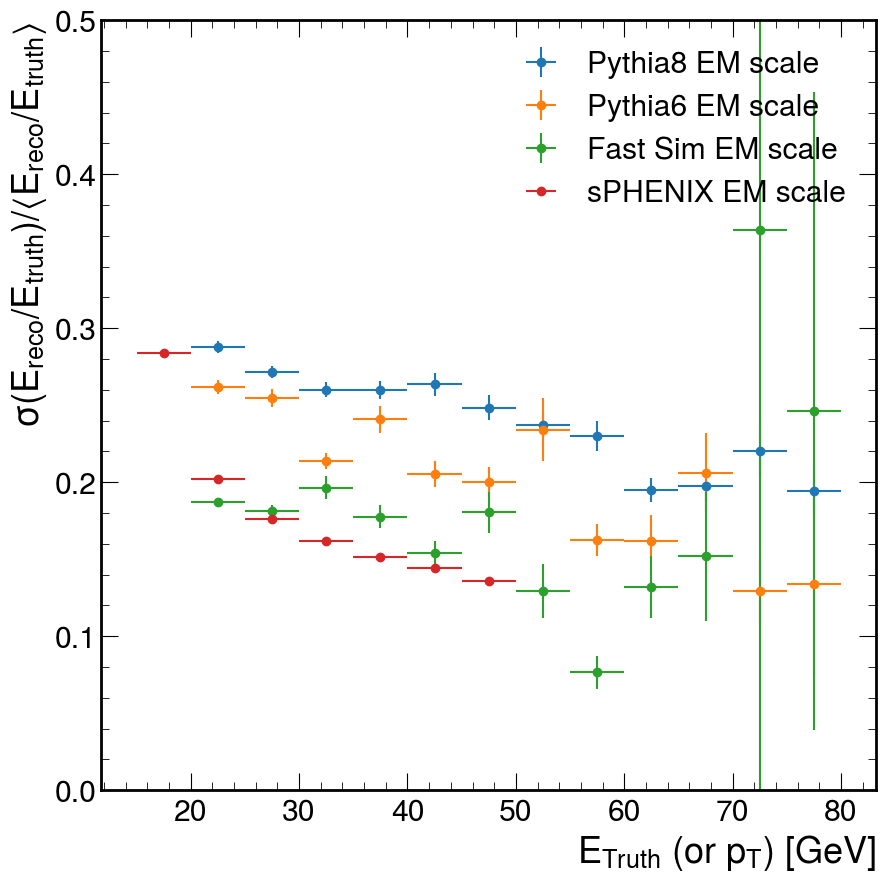

In [134]:
with open('Res_Pythia8_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Pythia8 EM scale')

with open('Res_Pythia6_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Pythia6 EM scale')

with open('Res_DELPHES_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)



plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Fast Sim EM scale')


plt.errorbar(sPHENIX_pt,sPHENIX_uncorr_sigmapt,xerr=5/2,fmt='o',label='sPHENIX EM scale')
plt.ylabel(r'$\sigma(E_{\mathrm{reco}}/E_{\mathrm{truth}})/ \langle E_{\mathrm{reco}}/E_{\mathrm{truth}}\rangle $')
plt.xlabel(r'$E_\mathrm{Truth}$ (or $p_{\mathrm{T}}$) [GeV]')


plt.legend()
plt.ylim(0,0.5)


(0.0, 0.5)

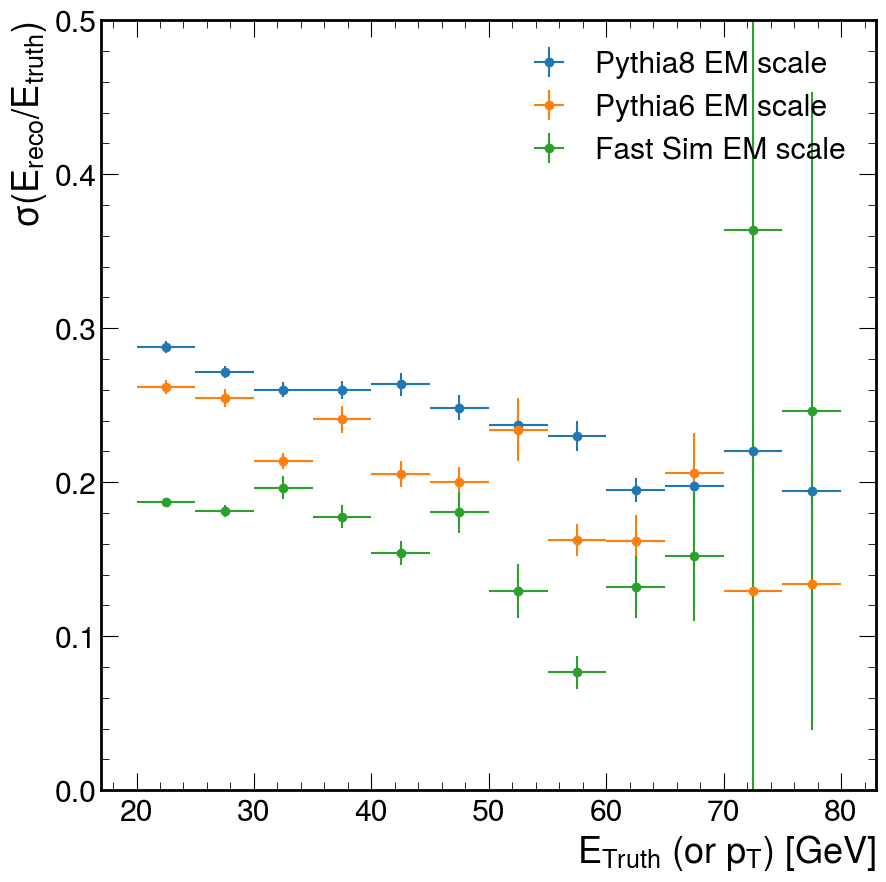

In [139]:
with open('Sigma_Pythia8_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=(5/2),fmt="o", label='Pythia8 EM scale')

with open('Sigma_Pythia6_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Pythia6 EM scale')

with open('Sigma_DELPHES_UC.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Fast Sim EM scale')



plt.legend()
plt.ylabel(r'$\sigma(E_{\mathrm{reco}}/E_{\mathrm{truth}})$')
plt.xlabel(r'$E_\mathrm{Truth}$ (or $p_{\mathrm{T}}$) [GeV]')
plt.ylim(0,0.5)

(0.0, 0.5)

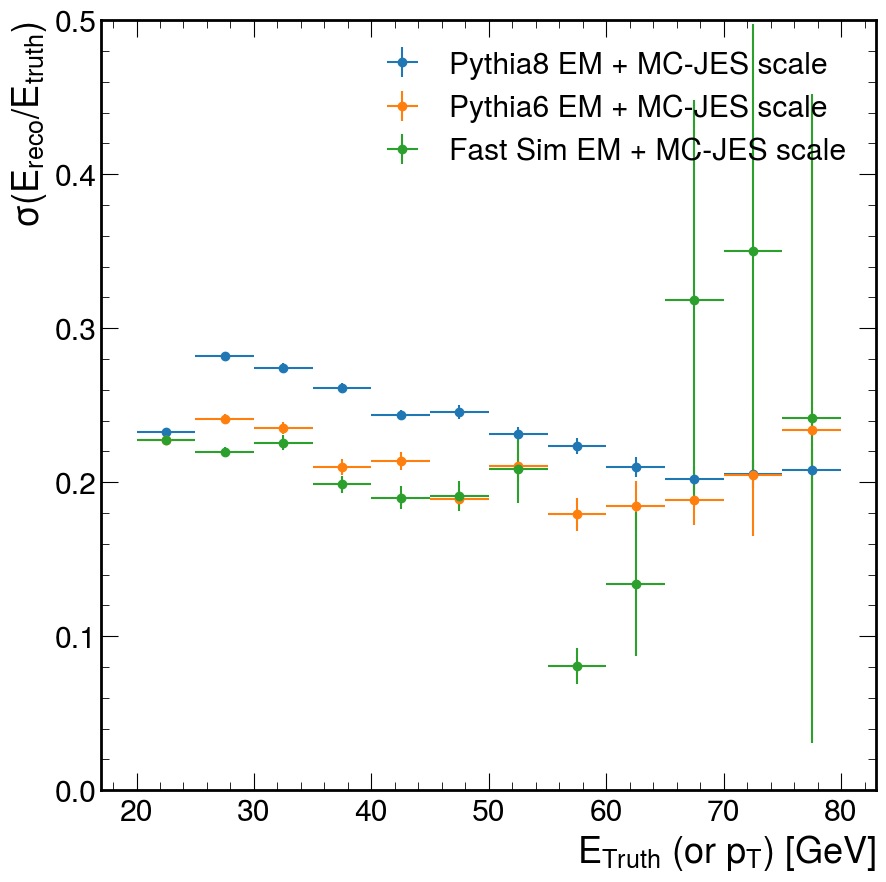

In [140]:
with open('Sigma_Pythia8_CPythia8.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=(5/2),fmt="o", label='Pythia8 EM + MC-JES scale')

with open('Sigma_Pythia6_CPythia6.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Pythia6 EM + MC-JES scale')

with open('Sigma_DELPHES_CDELPHES.pickle', 'rb') as handle:
    bins, Res, ResErr = pickle.load(handle)

plt.errorbar(bins+(5/2),Res,yerr=ResErr,xerr=5/2,fmt="o", label='Fast Sim EM + MC-JES scale')



plt.legend()
plt.ylabel(r'$\sigma(E_{\mathrm{reco}}/E_{\mathrm{truth}})$')
plt.xlabel(r'$E_\mathrm{Truth}$ (or $p_{\mathrm{T}}$) [GeV]')
plt.ylim(0,0.5)

In [141]:
with open('DELPHESGen_R_0.5_dR_0.25.pickle', 'rb') as handle:
    gen_dict = pickle.load(handle)
with open('DELPHESGen_R_0.5_dR_0.25.pickle', 'rb') as handle:
    reco_dict = pickle.load(handle)

In [142]:
with open('Pythia8Gen_R_0.5_dR_0.25.pickle', 'rb') as handle:
    reco_dict_test = pickle.load(handle)
with open('Pythia8Gen_R_0.5_dR_0.25.pickle', 'rb') as handle:
    gen_dict_test = pickle.load(handle)

In [143]:
with open('Pythia6Gen_R_0.5_dR_0.25.pickle', 'rb') as handle:
    reco_dict_b = pickle.load(handle)
with open('Pythia6Gen_R_0.5_dR_0.25.pickle', 'rb') as handle:
    gen_dict_b = pickle.load(handle)

In [5]:
mask = (ak.flatten(reco_dict["matched_index_new"]) > -1)
matchedJetE = ak.flatten(reco_dict["energy"])[mask]
matchedJetEta = ak.flatten(reco_dict["eta"])[mask]
matchedJetPhi = ak.flatten(reco_dict["phi"])[mask]
#phiMask = (matchedJetPhi > -0.4) & (matchedJetPhi < 0.4)
#matchedJetE = matchedJetE[phiMask]


mask = (ak.flatten(gen_dict["matched_index_new"]) > -1)
matchedGjetE = ak.flatten(gen_dict["energy"])[mask]
matchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
matchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]
#matchedGjetE = matchedGjetE[phiMask]

mask = ak.flatten(reco_dict["matched_index_new"]) == -1
unmatchedJetE = ak.flatten(reco_dict["energy"])[mask]
unmatchedJetEta = ak.flatten(reco_dict["eta"])[mask]
unmatchedJetPhi = ak.flatten(reco_dict["phi"])[mask]

mask = ak.flatten(gen_dict["matched_index_new"]) == -1
unmatchedGjetE = ak.flatten(gen_dict["energy"])[mask]
unmatchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
unmatchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]

In [6]:
mask = (ak.flatten(reco_dict_test["matched_index_new"]) > -1)
matchedJetEtest = ak.flatten(reco_dict_test["energy"])[mask]
matchedJetEtatest = ak.flatten(reco_dict_test["eta"])[mask]
matchedJetPhitest = ak.flatten(reco_dict_test["phi"])[mask]

mask = ak.flatten(gen_dict_test["matched_index_new"]) > -1
matchedGjetEtest = ak.flatten(gen_dict_test["energy"])[mask]
matchedGjetEtatest = ak.flatten(gen_dict_test["eta"])[mask]
matchedGjetPhitest = ak.flatten(gen_dict_test["phi"])[mask]

mask = ak.flatten(reco_dict_test["matched_index_new"]) == -1
unmatchedJetEtest = ak.flatten(reco_dict_test["energy"])[mask]
unmatchedJetEtatest = ak.flatten(reco_dict_test["eta"])[mask]
unmatchedJetPhitest = ak.flatten(reco_dict_test["phi"])[mask]

mask = ak.flatten(gen_dict_test["matched_index_new"]) == -1
unmatchedGjetEtest = ak.flatten(gen_dict_test["energy"])[mask]
unmatchedGjetEtatest = ak.flatten(gen_dict_test["eta"])[mask]
unmatchedGjetPhitest = ak.flatten(gen_dict_test["phi"])[mask]

In [7]:
mask = (ak.flatten(reco_dict_b["matched_index_new"]) > -1)
matchedJetEb = ak.flatten(reco_dict_b["energy"])[mask]
matchedJetEtab = ak.flatten(reco_dict_b["eta"])[mask]
matchedJetPhib = ak.flatten(reco_dict_b["phi"])[mask]

mask = ak.flatten(gen_dict_b["matched_index_new"]) > -1
matchedGjetEb = ak.flatten(gen_dict_b["energy"])[mask]
matchedGjetEtab = ak.flatten(gen_dict_b["eta"])[mask]
matchedGjetPhib = ak.flatten(gen_dict_b["phi"])[mask]

mask = ak.flatten(reco_dict_b["matched_index_new"]) == -1
unmatchedJetEb = ak.flatten(reco_dict_b["energy"])[mask]
unmatchedJetEtab = ak.flatten(reco_dict_b["eta"])[mask]
unmatchedJetPhib = ak.flatten(reco_dict_b["phi"])[mask]

mask = ak.flatten(gen_dict_b["matched_index_new"]) == -1
unmatchedGjetEb = ak.flatten(gen_dict_b["energy"])[mask]
unmatchedGjetEtab = ak.flatten(gen_dict_b["eta"])[mask]
unmatchedGjetPhib = ak.flatten(gen_dict_b["phi"])[mask]

In [8]:
PairedGenE = matchedGjetE
PairedRecoE = matchedJetE
JetR = PairedRecoE/PairedGenE

PairedGenEtest = matchedGjetEtest
PairedRecoEtest = matchedJetEtest
JetRtest = PairedRecoEtest/PairedGenEtest

PairedGenEb = matchedGjetEb
PairedRecoEb = matchedJetEb
JetRb = PairedRecoEb/PairedGenEb

Text(0, 1, 'Norm. Count')

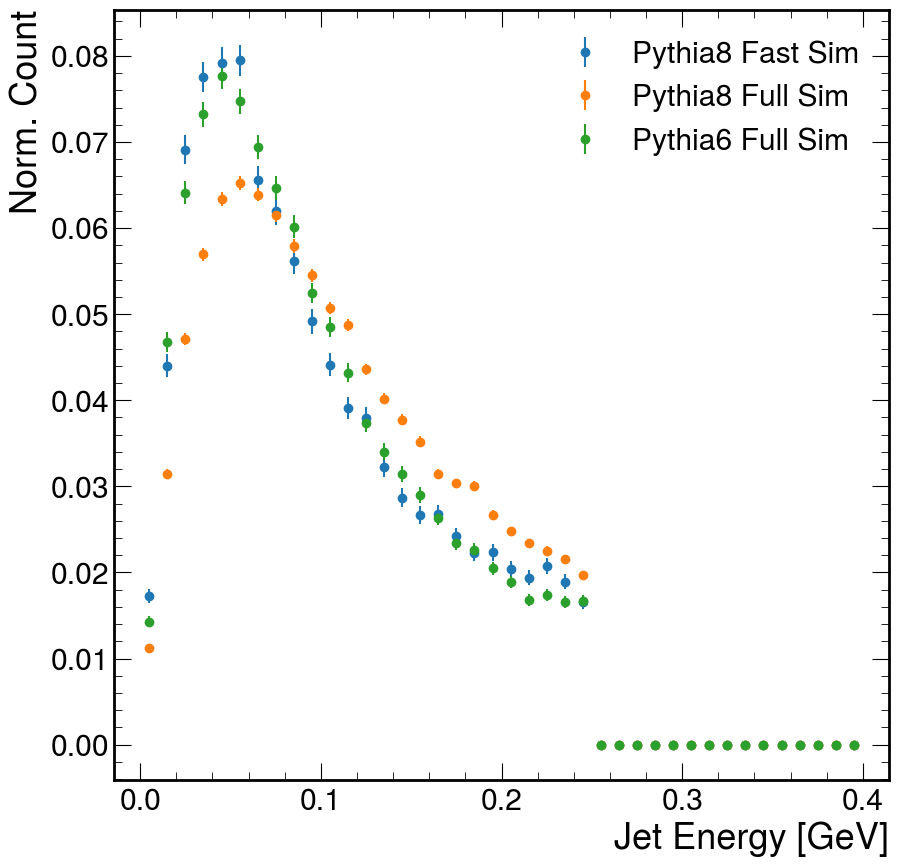

In [145]:
hist, bin_edges = np.histogram(ak.flatten(gen_dict["dR_new"]),range=(0,0.4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
total = np.sum(hist)
plt.errorbar(np.array(bin_centres),np.array(hist)/total,yerr=np.sqrt(hist)/total,fmt="o", label="Pythia8 Fast Sim")

hist, bin_edges = np.histogram(ak.flatten(gen_dict_test["dR_new"]),range=(0,0.4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
total = np.sum(hist)
plt.errorbar(np.array(bin_centres),np.array(hist)/total,yerr=np.sqrt(hist)/total,fmt="o", label="Pythia8 Full Sim")

hist, bin_edges = np.histogram(ak.flatten(gen_dict_b["dR_new"]),range=(0,0.4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
total = np.sum(hist)
plt.errorbar(np.array(bin_centres),np.array(hist)/total,yerr=np.sqrt(hist)/total,fmt="o", label="Pythia6 Full Sim")

plt.legend()

#plt.yscale("log")
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Norm. Count')


In [146]:
print(len(gen_dict["dR_new"]))
print(len(gen_dict_test["dR_new"]))
print(len(gen_dict_b["dR_new"]))

1000000
500000
994000
